Since we have already covered cross validation in earlier modules, we will not spend much time doing that here. We will instead go over how to build neural networks using PyTorch. Particularly we will look at the PyTorch.sequential framework, which proves to be a very nice framework to use. 

The .sequential framework is possibly the easiest way to build nn's, but it is so flexible that it allows you to change EVERYTHING about the network.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn

from sklearn.datasets import load_iris

### A note on tensors
Tensors are n-D matricies. The typical example is a 3D tensor. Note that a 2D matrix is essentially a tensor of order 2, and a column or row vector is a vector of order 1. So, even though PyTorch often works with 1D or 2D vectors/matricies, it refers to them as TENSORS regardless!

In [3]:
# pd.df can't be fed to torch
X, y = load_iris(return_X_y=True, as_frame=False)
y = np.array(pd.get_dummies(y))

We need to change data format to make it compatible with PyTorch. Float 32 is an arbitrary choice

In [4]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

## PyTorch Sequential Model

Recall last week we made a model of 4 inputs feeding into a hidden layer of 8 neurons, which fed to an output with 3 dimensions, each corresponding to each of the 3 classes. We thus had two matricies of weights W1 and W2, which were then learned/fit by using the data. But last time we built the model with numpy, now we use the PyTorch framework. 
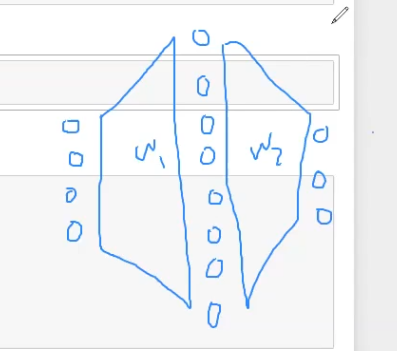

There is a special functio called SEQUENTIAL. We will build a model that represents the network itself. The model will be using the sequential function. The sequential function will itself take as input numerous layer functions that define network layers and sequential will wrap these into a single network.   

Note the pipeline structure in the code below and how it relates to the network architecture! 
- The first nn.Linear does the first linear transformation and produces the "pre-activation" values that enter the neuroms in the middle layer
- The .Sigmoid is the activation that creates the output from the middle layer
- The second nn.Linear is the second linear transformation that creates the "pre-activation" values that go into the output neurons
- The .Softmax is the final activation that creates the final output

In the same way that the sigmoid takes logits (logodds) and converts them to probabilities, the softmax takes a real value and converts it to a probability under the condition that the sum of all probability outputs will sum to 1. Softmax inputs are thus non-normalized probabilities.

In [10]:
model = nn.Sequential(nn.Linear(in_features=4, out_features=8), 
                      nn.Sigmoid(),
                      nn.Linear(in_features=8, out_features=3), 
                      nn.Softmax(dim=1) #dim=1 as outputs have only 1 dimension
                     )



# Now that the network is defined we need a loss function
# Cross entropy is suitable when outputing probabilities and the target values are binary 1/0
loss = nn.CrossEntropyLoss()

# Previously we had an optimizer as past of a class, but now theya re distinct
# We could thus use different optimizers and see which is best
# SGD = Stochastic Gradient Descent
# lr = larning_rate
# model.parameters() provides the W1 and W2 tensors for optimization
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

PyTorch does not have its own "fit" function like in SKLearn. This is because there really is no "one size fits all" fitting process, it can be customized as we wish. We could create a function called fit() and then use that to fit, but that is not the point of PyTorch. The entire point is for us to create our own training loop to train the model.

In [ ]:
'''Main training loop'''

losses = []
scores = []

